In [1]:
#install require libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import pylab
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.experimental import enable_iterative_imputer
from math import sqrt
from statsmodels.tsa.stattools import adfuller

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("C:/Users/sidda/Desktop/project 97/TMT-JUNE-2020_2 (1) - Copy.csv")  # reading dataset with pandas
df.columns

Index(['Date', 'Time', 'Location', 'Sales in Rs/T', 'Sales volume in Tonnes',
       'Price/ kg', 'Climate', 'Customer ID', 'Diameter', 'Length', 'Grade',
       'Current stock', 'Re-order', 'Lead time', 'Production time',
       'Units Produced ', 'Production cost'],
      dtype='object')

In [3]:
df.shape #to check the how many rows and columns

(10000, 17)

C:\Users\sidda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales volume in Tonnes', ylabel='Density'>

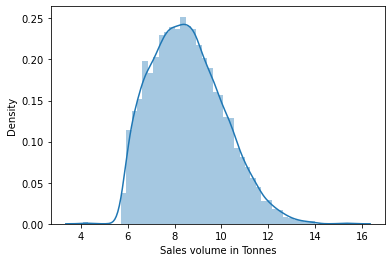

In [4]:
#(df['Sales in Rs/T']).skew()
sns.distplot(df['Sales volume in Tonnes'])

In [5]:
df.head() #it showing top five rows of the dataset
#import statsmodels.api as sm
#sm.graphics.tsa.plot_acf(df_num.Sales_volume_in_Tonnes.squeeze(), lags=12)
#sm.graphics.tsa.plot_pacf(df_num.Sales_volume_in_Tonnes.squeeze(), lags=12)

,Date,Time,Location,Sales in Rs/T,Sales volume in Tonnes,Price/ kg,Climate,Customer ID,Diameter,Length,Grade,Current stock,Re-order,Lead time,Production time,Units Produced,Production cost
0,14-10-1995,11:08 AM,Pune,424440.0,7.07,60.0,Rainy,C9D3791C,32.0,13,Fe-500,10770,618,7,3,14828,18734
1,15-10-1995,10:07 AM,Hyderabad,426000.0,8.35,51.0,Rainy,F515841D,12.0,7,Fe-415,8039,1195,2,3,12795,21294
2,16-10-1995,5:25 PM,Kolkata,429360.0,6.82,63.0,Rainy,B387F82E,12.0,9,Fe-500D,7328,1372,14,6,13576,19759
3,17-10-1995,10:00 AM,Bengaluru,432000.0,6.86,63.0,Rainy,A8EBB29A,8.0,25,Fe-550,3040,688,14,2,8060,23073
4,18-10-1995,4:39 PM,Delhi,432000.0,7.45,58.0,Rainy,DC1D8CD9,32.0,27,Fe-500,9011,704,11,6,7532,19986


In [6]:
df.isnull().sum() #checking null values

Date                       0
Time                      11
Location                   6
Sales in Rs/T              8
Sales volume in Tonnes     8
Price/ kg                  5
Climate                    9
Customer ID                0
Diameter                   2
Length                     0
Grade                      5
Current stock              0
Re-order                   0
Lead time                  0
Production time            0
Units Produced             0
Production cost            0
dtype: int64

In [43]:
df.info() #it showing type of the data and count of non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10000 non-null  object 
 1   Time                    9989 non-null   object 
 2   Location                9994 non-null   object 
 3   Sales in Rs/T           9992 non-null   float64
 4   Sales volume in Tonnes  9992 non-null   float64
 5   Price/ kg               9995 non-null   float64
 6   Climate                 9991 non-null   object 
 7   Customer ID             10000 non-null  object 
 8   Diameter                9998 non-null   float64
 9   Length                  10000 non-null  int64  
 10  Grade                   9995 non-null   object 
 11  Current stock           10000 non-null  int64  
 12  Re-order                10000 non-null  int64  
 13  Lead time               10000 non-null  int64  
 14  Production time         10000 non-null 

In [44]:
df['Date']=pd.to_datetime(df['Date'])
# set the Date column be the index of our dataset
df= df.set_index('Date')
# now check the data shape


In [45]:
df

,Time,Location,Sales in Rs/T,Sales volume in Tonnes,Price/ kg,Climate,Customer ID,Diameter,Length,Grade,Current stock,Re-order,Lead time,Production time,Units Produced,Production cost
Date,,,,,,,,,,,,,,,,
1995-10-14,11:08 AM,Pune,424440.0,7.07,60.0,Rainy,C9D3791C,32.0,13,Fe-500,10770,618,7,3,14828,18734
1995-10-15,10:07 AM,Hyderabad,426000.0,8.35,51.0,Rainy,F515841D,12.0,7,Fe-415,8039,1195,2,3,12795,21294
1995-10-16,5:25 PM,Kolkata,429360.0,6.82,63.0,Rainy,B387F82E,12.0,9,Fe-500D,7328,1372,14,6,13576,19759
1995-10-17,10:00 AM,Bengaluru,432000.0,6.86,63.0,Rainy,A8EBB29A,8.0,25,Fe-550,3040,688,14,2,8060,23073
1995-10-18,4:39 PM,Delhi,432000.0,7.45,58.0,Rainy,DC1D8CD9,32.0,27,Fe-500,9011,704,11,6,7532,19986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,12:51 PM,Pune,509579.0,9.13,52.0,Winter,94CE748E,9.0,19,Fe-500D,3695,1206,14,6,7434,17790
2023-02-25,11:08 AM,Delhi,612511.0,9.99,53.0,Winter,EE75A871,16.0,27,Fe-600D,7225,1492,8,4,10847,22642
2023-02-26,5:19 PM,Kolkata,672718.0,8.84,70.0,Sunny,D3B1B31D,19.0,18,Fe-550D,12102,609,8,1,12405,23116


In [46]:
df.describe() #getting statstical insights 

,Sales in Rs/T,Sales volume in Tonnes,Price/ kg,Diameter,Length,Current stock,Re-order,Lead time,Production time,Units Produced,Production cost
count,9992.000000,9992.000000,9995.000000,9998.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,541320.140112,8.546244,62.958179,16.974995,17.930300,8991.488900,999.154800,8.011000,4.035200,10921.567000,20079.277400
std,75223.368004,1.531126,6.472928,6.467049,8.123869,3420.646321,285.957747,4.049953,1.783726,2288.349041,2854.058653
min,4158.000000,4.100000,50.000000,8.000000,4.000000,3003.000000,502.000000,1.000000,1.000000,6017.000000,15004.000000
25%,481218.000000,7.380000,58.000000,12.000000,11.000000,6045.750000,753.000000,5.000000,3.000000,8957.750000,17670.750000
50%,536157.000000,8.430000,63.000000,16.000000,18.000000,9080.000000,999.000000,8.000000,4.000000,10886.500000,20150.500000
75%,594403.750000,9.570000,68.000000,21.000000,25.000000,11919.500000,1245.000000,11.000000,6.000000,12883.000000,22524.000000
max,717230.000000,15.600000,74.000000,32.000000,32.000000,14989.000000,1500.000000,15.000000,7.000000,15800.000000,25000.000000


In [47]:
df.var()

C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Sales in Rs/T             5.658555e+09
Sales volume in Tonnes    2.344348e+00
Price/ kg                 4.189879e+01
Diameter                  4.182272e+01
Length                    6.599724e+01
Current stock             1.170082e+07
Re-order                  8.177183e+04
Lead time                 1.640212e+01
Production time           3.181679e+00
Units Produced            5.236541e+06
Production cost           8.145651e+06
dtype: float64

# Auto EDA


In [48]:
from ydata_profiling import ProfileReport   # auto EDA for getting visual insights from the given dataset

In [ ]:
ProfileReport(df)    #using pandas_profile

# EDA

In [49]:
print(df.mean())

Sales in Rs/T             541320.140112
Sales volume in Tonnes         8.546244
Price/ kg                     62.958179
Diameter                      16.974995
Length                        17.930300
Current stock               8991.488900
Re-order                     999.154800
Lead time                      8.011000
Production time                4.035200
Units Produced             10921.567000
Production cost            20079.277400
dtype: float64


C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/2807316344.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [50]:
print(df.median())

Sales in Rs/T             536157.00
Sales volume in Tonnes         8.43
Price/ kg                     63.00
Diameter                      16.00
Length                        18.00
Current stock               9080.00
Re-order                     999.00
Lead time                      8.00
Production time                4.00
Units Produced             10886.50
Production cost            20150.50
dtype: float64


C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/4259369830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


In [51]:
df.skew()

C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sales in Rs/T             0.086901
Sales volume in Tonnes    0.468308
Price/ kg                -0.159762
Diameter                  0.589913
Length                    0.015827
Current stock            -0.015762
Re-order                  0.005727
Lead time                 0.002804
Production time          -0.037894
Units Produced            0.031534
Production cost          -0.042865
dtype: float64

In [52]:
df.kurt()

C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Sales in Rs/T             0.547886
Sales volume in Tonnes   -0.086608
Price/ kg                -1.006872
Diameter                 -0.605864
Length                   -1.201782
Current stock            -1.184977
Re-order                 -1.173889
Lead time                -1.159690
Production time          -1.091210
Units Produced           -1.180364
Production cost          -1.173977
dtype: float64

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

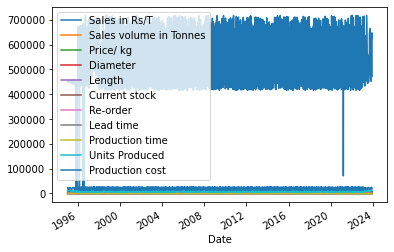

In [54]:
df.plot()

<AxesSubplot:xlabel='Climate', ylabel='count'>

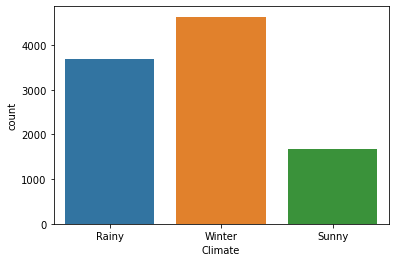

In [55]:
sns.countplot(x='Climate',data=df)

<AxesSubplot:xlabel='Location', ylabel='Sales volume in Tonnes'>

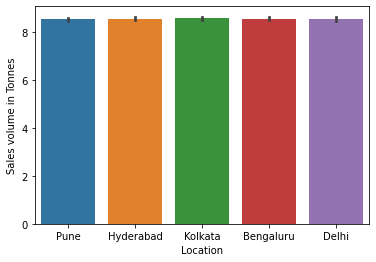

In [56]:
sns.barplot(x='Location',y='Sales volume in Tonnes',data=df)

<AxesSubplot:>

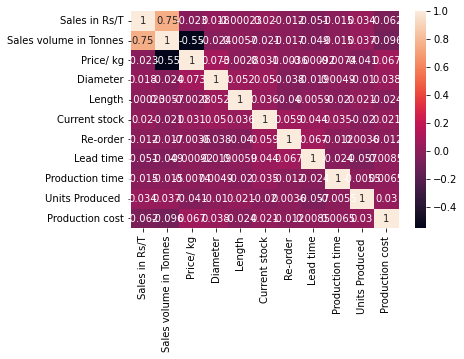

In [57]:
sns.heatmap(df.corr(), annot=True)

In [58]:
df.corr()

,Sales in Rs/T,Sales volume in Tonnes,Price/ kg,Diameter,Length,Current stock,Re-order,Lead time,Production time,Units Produced,Production cost
Sales in Rs/T,1.000000,0.754005,-0.022801,0.018143,-0.000227,0.020280,-0.012087,-0.051034,-0.015288,0.034298,-0.062014
Sales volume in Tonnes,0.754005,1.000000,-0.550968,-0.023646,0.005684,-0.020504,-0.017205,-0.049048,-0.014521,0.036505,-0.095957
Price/ kg,-0.022801,-0.550968,1.000000,0.073187,-0.002847,0.030911,-0.003612,-0.000919,-0.007403,-0.040791,0.066806
Diameter,0.018143,-0.023646,0.073187,1.000000,0.051788,0.050492,-0.037509,-0.018732,0.004932,-0.010057,0.038447
Length,-0.000227,0.005684,-0.002847,0.051788,1.000000,0.036285,-0.039516,0.005914,-0.020480,0.021417,-0.023918
Current stock,0.020280,-0.020504,0.030911,0.050492,0.036285,1.000000,0.058809,0.043882,0.034917,-0.020435,0.020588
Re-order,-0.012087,-0.017205,-0.003612,-0.037509,-0.039516,0.058809,1.000000,0.067411,-0.012063,0.003640,-0.011682
Lead time,-0.051034,-0.049048,-0.000919,-0.018732,0.005914,0.043882,0.067411,1.000000,-0.023644,-0.057345,0.008517
Production time,-0.015288,-0.014521,-0.007403,0.004932,-0.020480,0.034917,-0.012063,-0.023644,1.000000,-0.005528,0.006544
Units Produced,0.034298,0.036505,-0.040791,-0.010057,0.021417,-0.020435,0.003640,-0.057345,-0.005528,1.000000,0.029643


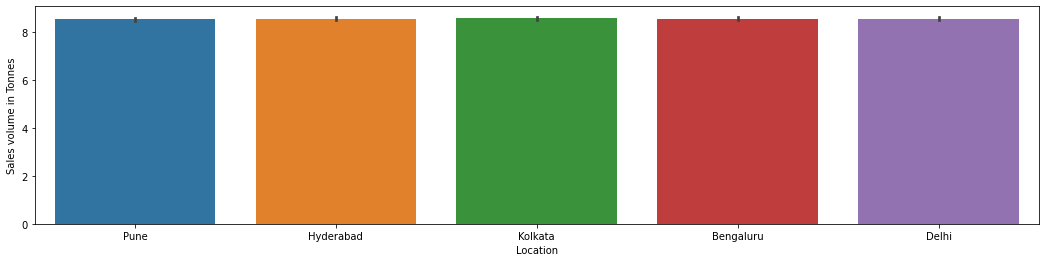

In [114]:
sns.barplot(x=df['Location'],y=df['Sales volume in Tonnes'])
plt.show()


In [ ]:
df.head()

In [ ]:
df.head()
df.shape

# data Preprocessing

In [ ]:
##remove unwanted coloumns

In [60]:
df1=df.drop(['Time','Customer ID'],axis=True)

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 1995-10-14 to 2023-02-28
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                9994 non-null   object 
 1   Sales in Rs/T           9992 non-null   float64
 2   Sales volume in Tonnes  9992 non-null   float64
 3   Price/ kg               9995 non-null   float64
 4   Climate                 9991 non-null   object 
 5   Diameter                9998 non-null   float64
 6   Length                  10000 non-null  int64  
 7   Grade                   9995 non-null   object 
 8   Current stock           10000 non-null  int64  
 9   Re-order                10000 non-null  int64  
 10  Lead time               10000 non-null  int64  
 11  Production time         10000 non-null  int64  
 12  Units Produced          10000 non-null  int64  
 13  Production cost         10000 non-null  int64  
dtypes: float64(4), int64(

In [185]:
df_num = df1.select_dtypes(exclude='object') #selecting numeric type coloumns
df_num

,Sales in Rs/T,Sales volume in Tonnes,Price/ kg,Diameter,Length,Current stock,Re-order,Lead time,Production time,Units Produced,Production cost
Date,,,,,,,,,,,
1995-10-14,424440.0,7.07,60.0,32.0,13,10770,618,7,3,14828,18734
1995-10-15,426000.0,8.35,51.0,12.0,7,8039,1195,2,3,12795,21294
1995-10-16,429360.0,6.82,63.0,12.0,9,7328,1372,14,6,13576,19759
1995-10-17,432000.0,6.86,63.0,8.0,25,3040,688,14,2,8060,23073
1995-10-18,432000.0,7.45,58.0,32.0,27,9011,704,11,6,7532,19986
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,509579.0,9.13,52.0,9.0,19,3695,1206,14,6,7434,17790
2023-02-25,612511.0,9.99,53.0,16.0,27,7225,1492,8,4,10847,22642
2023-02-26,672718.0,8.84,70.0,19.0,18,12102,609,8,1,12405,23116


In [63]:
df_cat = df1.select_dtypes(include='object') # selecting object type coloumns

In [64]:
df_cat

,Location,Climate,Grade
Date,,,
1995-10-14,Pune,Rainy,Fe-500
1995-10-15,Hyderabad,Rainy,Fe-415
1995-10-16,Kolkata,Rainy,Fe-500D
1995-10-17,Bengaluru,Rainy,Fe-550
1995-10-18,Delhi,Rainy,Fe-500
...,...,...,...
2023-02-24,Pune,Winter,Fe-500D
2023-02-25,Delhi,Winter,Fe-600D
2023-02-26,Kolkata,Sunny,Fe-550D


In [65]:
df_num['Diameter']=df_num['Diameter'].replace(np.nan,df_num['Diameter'].mean())  #first i did typecasting but nan values are not converting to int so i impute the mNan values in 

C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/2795479545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Diameter']=df_num['Diameter'].replace(np.nan,df_num['Diameter'].mean())  #first i did typecasting but nan values are not converting to int so i impute the mNan values in


In [66]:
#type casting to the float to int

In [67]:
df_num["Diameter"]=df_num["Diameter"].astype('int64')


C:\Users\sidda\AppData\Local\Temp/ipykernel_21608/648609139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Diameter"]=df_num["Diameter"].astype('int64')


In [186]:
df_num = df_num.rename({'Sales in Rs/T': 'Sales_in_rs_per_ton', 'Sales volume in Tonnes': 'Sales_volume_in_Tonnes','Price/ kg':"Price_per_kg",'Re-order':'Re_order','Lead time':'Lead_time','Production time':'Production_time','Units Produced':'Units_Produce','Production cost':'Production_cost'}, axis=1)

# missing values

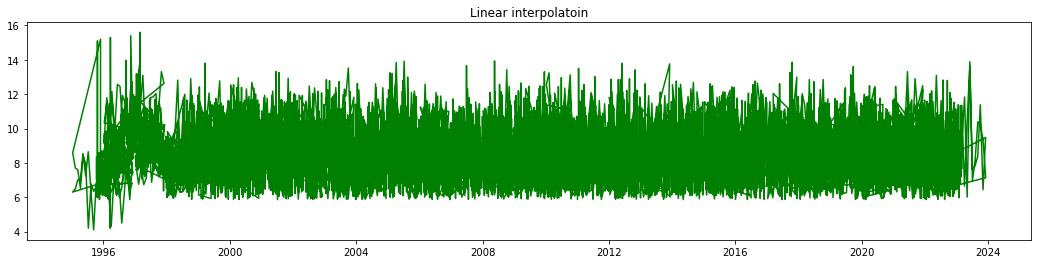

In [187]:
# setting the plot size
plt.rcParams['figure.figsize']=(18,4)
# on our data, impute the missing values using rolling window method
df_num['Sales_volume_in_Tonnes']= df_num['Sales_volume_in_Tonnes'].interpolate(method='linear')
# plot the complete dataset
plt.plot(df_num['Sales_volume_in_Tonnes'], color='green')
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.show()

# using simple imputer

In [188]:
from sklearn.impute import SimpleImputer

In [69]:
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [70]:
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [71]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 1995-10-14 to 2023-02-28
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales in Rs/T           9992 non-null   float64
 1   Sales volume in Tonnes  9992 non-null   float64
 2   Price/ kg               9995 non-null   float64
 3   Diameter                10000 non-null  int64  
 4   Length                  10000 non-null  int64  
 5   Current stock           10000 non-null  int64  
 6   Re-order                10000 non-null  int64  
 7   Lead time               10000 non-null  int64  
 8   Production time         10000 non-null  int64  
 9   Units Produced          10000 non-null  int64  
 10  Production cost         10000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 937.5 KB


In [189]:
df_num['Sales_in_rs_per_ton']= df_num['Sales_in_rs_per_ton'].interpolate(method='linear')

In [190]:
df_num['Sales_volume_in_Tonnes']= df_num['Sales_volume_in_Tonnes'].interpolate(method='linear')


In [191]:
df_num['Price_per_kg']= df_num['Price_per_kg'].interpolate(method='linear')

In [192]:
df_num['Diameter']= df_num['Diameter'].interpolate(method='linear')

In [193]:
df_num.isnull().sum()

Sales_in_rs_per_ton       0
Sales_volume_in_Tonnes    0
Price_per_kg              0
Diameter                  0
Length                    0
Current stock             0
Re_order                  0
Lead_time                 0
Production_time           0
Units Produced            0
Production_cost           0
dtype: int64

In [194]:
#df_num.info()

In [195]:
#df_num["Diameter"]=df_num["Diameter"].astype('int64')
df_num

,Sales_in_rs_per_ton,Sales_volume_in_Tonnes,Price_per_kg,Diameter,Length,Current stock,Re_order,Lead_time,Production_time,Units Produced,Production_cost
Date,,,,,,,,,,,
1995-10-14,424440.0,7.07,60.0,32.0,13,10770,618,7,3,14828,18734
1995-10-15,426000.0,8.35,51.0,12.0,7,8039,1195,2,3,12795,21294
1995-10-16,429360.0,6.82,63.0,12.0,9,7328,1372,14,6,13576,19759
1995-10-17,432000.0,6.86,63.0,8.0,25,3040,688,14,2,8060,23073
1995-10-18,432000.0,7.45,58.0,32.0,27,9011,704,11,6,7532,19986
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,509579.0,9.13,52.0,9.0,19,3695,1206,14,6,7434,17790
2023-02-25,612511.0,9.99,53.0,16.0,27,7225,1492,8,4,10847,22642
2023-02-26,672718.0,8.84,70.0,19.0,18,12102,609,8,1,12405,23116


In [ ]:
#df_num["Sales_in_rs_per_ton"]=df_num["Sales_in_rs_per_ton"].astype('int64')
df_cat

In [ ]:
df_cat.isnull().sum()

In [391]:
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [392]:
df_cat = pd.DataFrame(mode_imp.fit_transform(df_cat))

In [ ]:
#df_cat['Location'] = df_cat['Location'].fillna(df_cat['Location'].mode()[0])

In [ ]:
#df_cat['Climate'] = df_cat['Climate'].fillna(df_cat['Climate'].mode()[0])

In [393]:
df_cat.isnull().sum()

0    0
1    0
2    0
dtype: int64

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


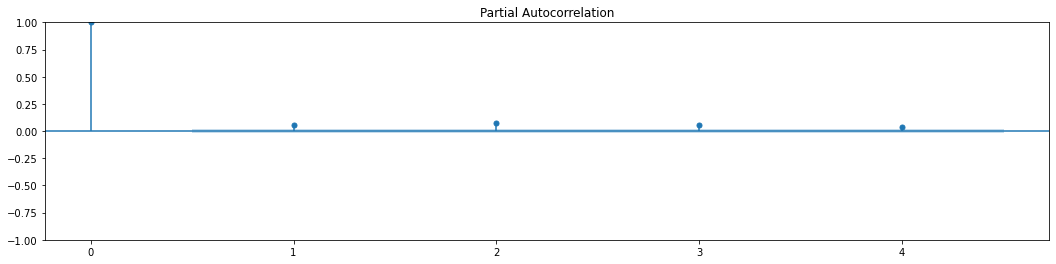

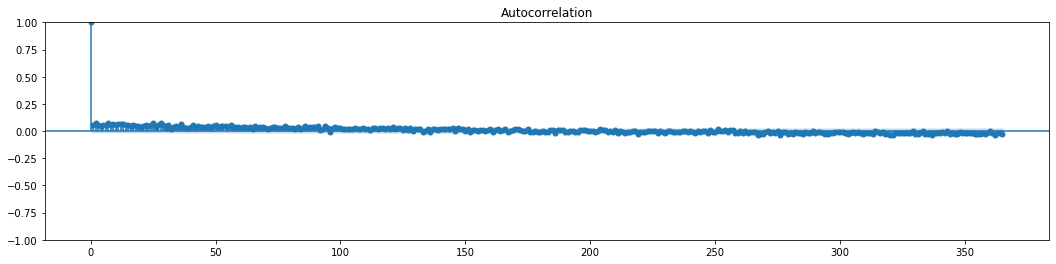

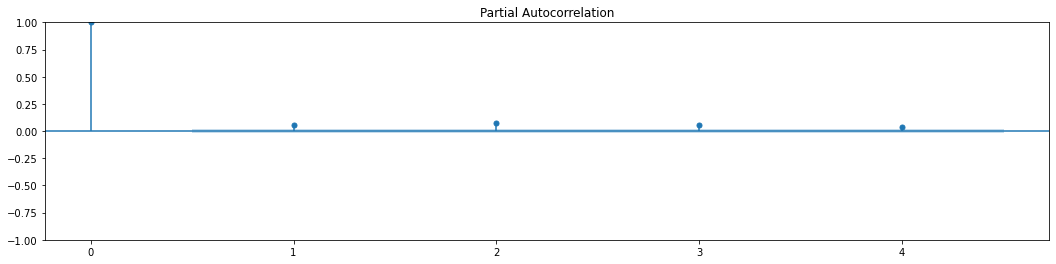

In [394]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_num.Sales_volume_in_Tonnes.squeeze(), lags=365)
sm.graphics.tsa.plot_pacf(df_num.Sales_volume_in_Tonnes.squeeze(), lags=4)

In [395]:
#Calculate ad fuller statistic
adf = adfuller(df_num['Sales_volume_in_Tonnes'])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.0 , Series is Stationary


C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


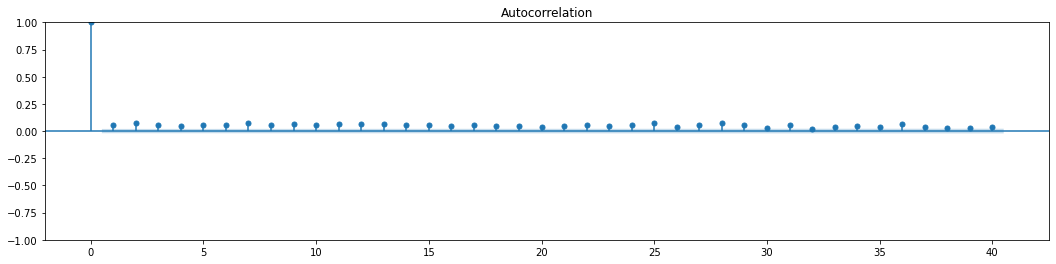

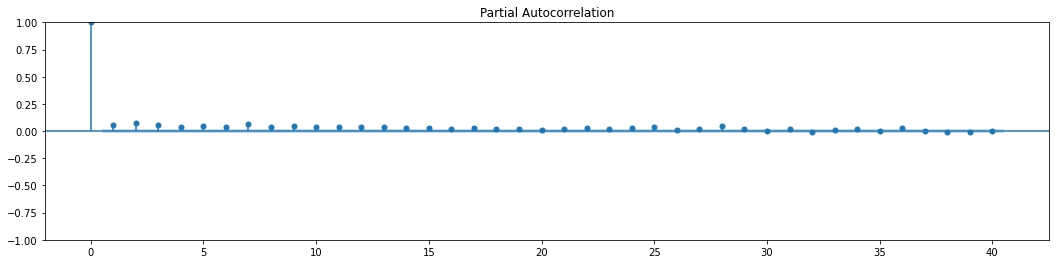

In [198]:
plot_acf(df_num['Sales_volume_in_Tonnes']);
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_num['Sales_volume_in_Tonnes']);

In [396]:
df_t=pd.DataFrame(df_num['Sales_volume_in_Tonnes'])

# duplicate values

In [397]:
df_cat.duplicated().sum()

9880

In [398]:
df_num.duplicated().sum()

0

In [399]:
#df_num.var() # variance of numeric variables
#df_num.var() == 0
df_num.var(axis = 0) == 0

Sales_in_rs_per_ton       False
Sales_volume_in_Tonnes    False
Price_per_kg              False
Diameter                  False
Length                    False
Current stock             False
Re_order                  False
Lead_time                 False
Production_time           False
Units Produced            False
Production_cost           False
dtype: bool

# #  outlier analysis

<AxesSubplot:>

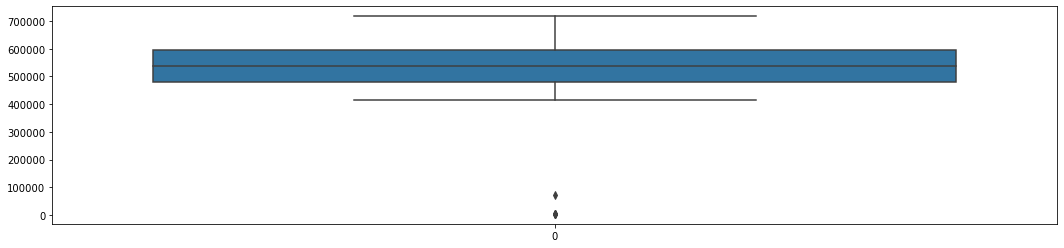

In [400]:
#sns.boxplot(data=df_num['Sales_volume_in_Tonnes'])
sns.boxplot(data=df_num['Sales_in_rs_per_ton'])

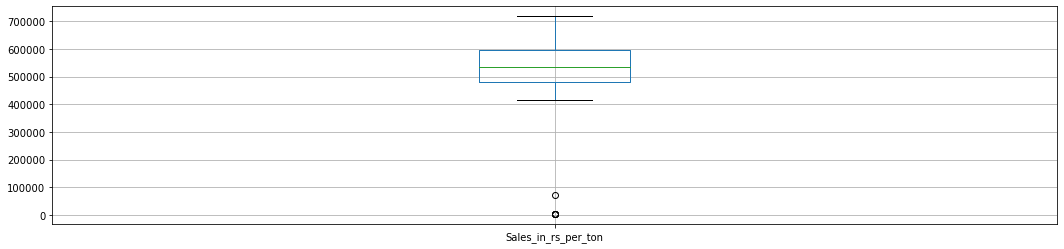

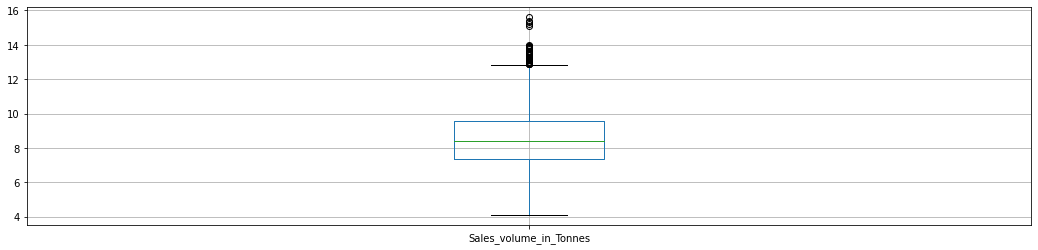

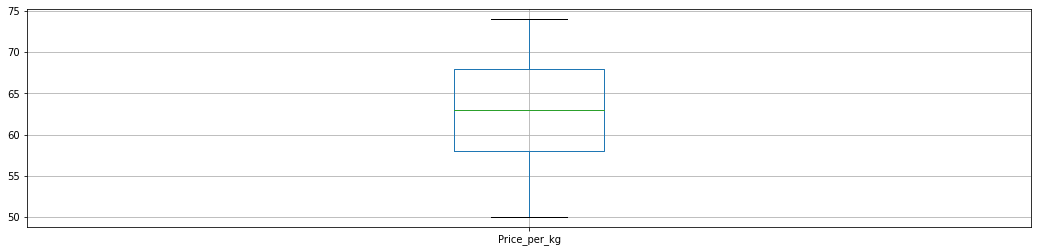

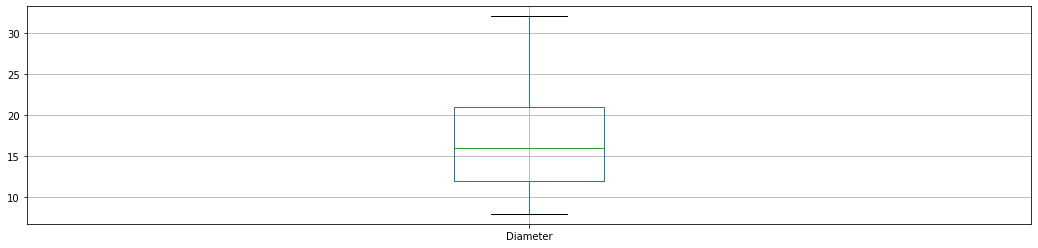

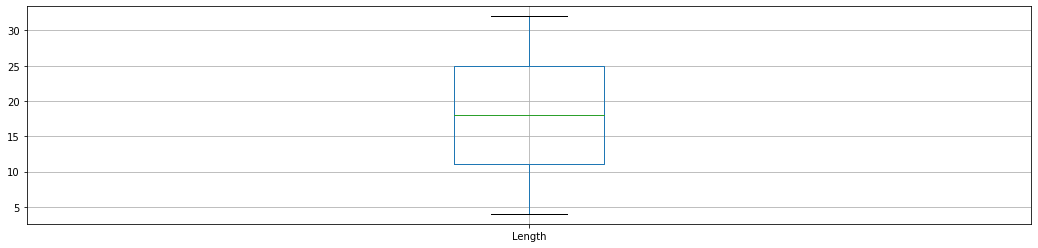

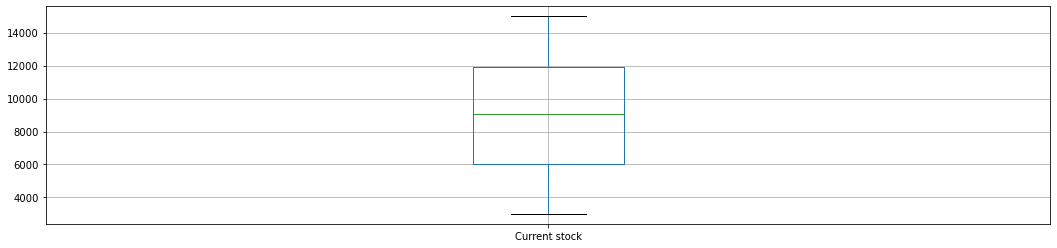

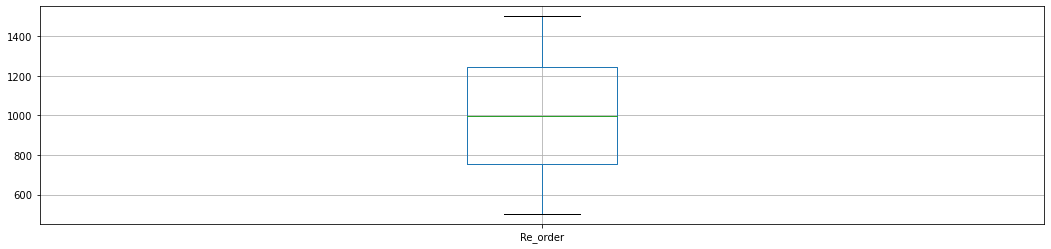

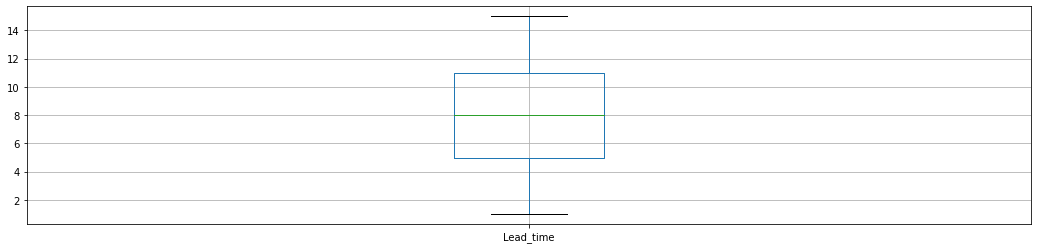

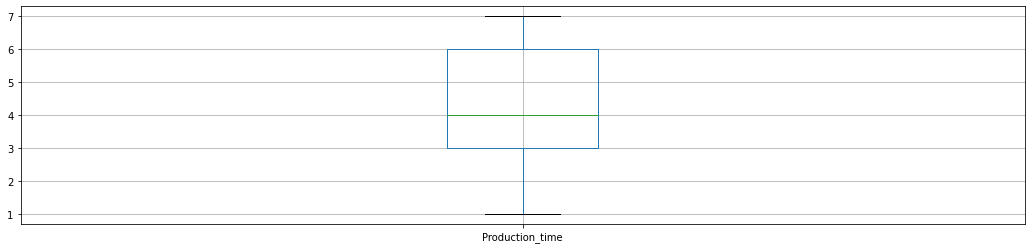

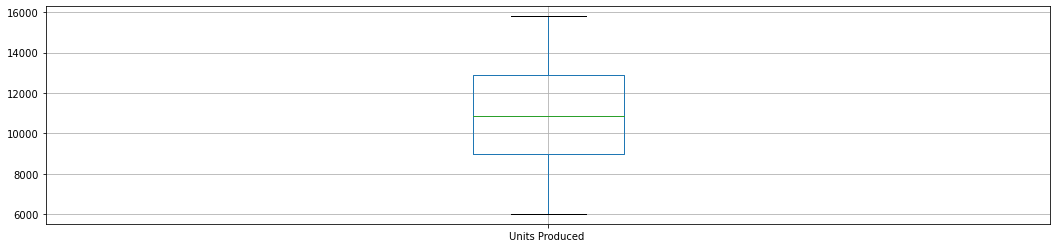

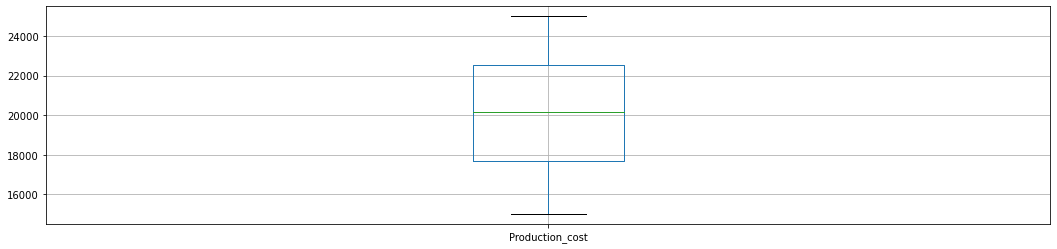

In [401]:
for i in df_num.columns:
    df_num[[i]].boxplot()
    plt.show()


In [402]:
print(np.where(df_num['Sales_in_rs_per_ton']<100000))#outliers are present. is extremly low values

(array([   5,   46,  131,  177,  257, 9547], dtype=int64),)


In [403]:
print(np.where(df_num['Sales_volume_in_Tonnes']>13))# there are some outliers present in the data but those are not outliers

(array([  11,   47,  161,  342,  396,  462,  469,  479,  486,  489,  491,
        497,  501, 1256, 2077, 2109, 2704, 3392, 3417, 3582, 3585, 4276,
       4600, 4623, 5176, 5375, 5445, 5571, 5759, 6070, 6226, 6331, 8013,
       8040, 8608, 8716, 8746, 9520, 9884, 9946, 9977], dtype=int64),)


In [404]:
df_num['Sales_volume_in_Tonnes'].max()

15.6

In [405]:
(df_num['Sales_volume_in_Tonnes']>15.6).sum()

0

In [406]:
IQR = df_num.quantile(0.75) - df_num.quantile(0.25) # IQR - Inter quartile range IQR = Q3-Q1
lower_limit = df_num.quantile(0.25) - (IQR * 1.5) # Q1 - 1.5 * IQR
upper_limit = df_num.quantile(0.75) + (IQR * 1.5) # Q3 + 1.5 * IQR

In [407]:
IQR = df_num['Sales_volume_in_Tonnes'].quantile(0.75) - df_num['Sales_volume_in_Tonnes'].quantile(0.25) # IQR - Inter quartile range IQR = Q3-Q1
lower_limit = df_num['Sales_volume_in_Tonnes'].quantile(0.25) - (IQR * 1.5) # Q1 - 1.5 * IQR
upper_limit =df_num['Sales_volume_in_Tonnes'].quantile(0.75) + (IQR * 1.5)

In [408]:

outliers_df = np.where(df_num.Sales_volume_in_Tonnes > upper_limit, True, np.where(df_num.Sales_volume_in_Tonnes < lower_limit, True, False))
df_trimmed = df_num.loc[~(outliers_df),]
df_num.shape, df_trimmed.shape

((10000, 11), (9949, 11))

In [409]:
df_num

,Sales_in_rs_per_ton,Sales_volume_in_Tonnes,Price_per_kg,Diameter,Length,Current stock,Re_order,Lead_time,Production_time,Units Produced,Production_cost
Date,,,,,,,,,,,
1995-10-14,424440.0,7.07,60.0,32.0,13,10770,618,7,3,14828,18734
1995-10-15,426000.0,8.35,51.0,12.0,7,8039,1195,2,3,12795,21294
1995-10-16,429360.0,6.82,63.0,12.0,9,7328,1372,14,6,13576,19759
1995-10-17,432000.0,6.86,63.0,8.0,25,3040,688,14,2,8060,23073
1995-10-18,432000.0,7.45,58.0,32.0,27,9011,704,11,6,7532,19986
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,509579.0,9.13,52.0,9.0,19,3695,1206,14,6,7434,17790
2023-02-25,612511.0,9.99,53.0,16.0,27,7225,1492,8,4,10847,22642
2023-02-26,672718.0,8.84,70.0,19.0,18,12102,609,8,1,12405,23116


In [410]:
#i dont want to remove outliers because it loss the some information dataset
#modify the distubtion with removing by outliers
#pip install feature_engine

In [411]:
import feature_engine.outliers.winsorizer

In [416]:
from feature_engine.outliers.winsorizer import Winsorizer

In [417]:
winsorizer = Winsorizer(capping_method ='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5, # 1.5 times of iqr
                          variables=['Sales_volume_in_Tonnes'])

In [418]:
df_num['Sales_volume_in_Tonnes'] = winsorizer.fit_transform(df_num[['Sales_volume_in_Tonnes']])

<AxesSubplot:>

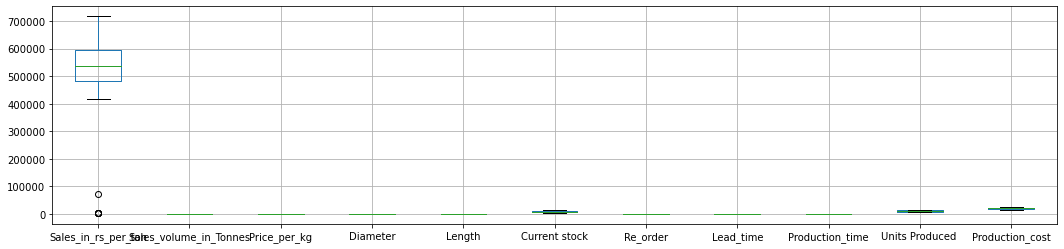

In [419]:
df_num.boxplot()

# descritization

In [ ]:
# if need will do

# dummy variablecom

In [420]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  object
 1   1       10000 non-null  object
 2   2       10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [421]:
from sklearn.preprocessing import LabelEncoder

In [422]:
# Creating instance of labelencoder
labelencoder = LabelEncoder()

In [423]:
#df_cat['Climate'] = labelencoder.fit_transform(df_cat['Climate'] )

In [424]:
df_cat1=df_cat

In [425]:
df_cat1

,0,1,2
0,Pune,Rainy,Fe-500
1,Hyderabad,Rainy,Fe-415
2,Kolkata,Rainy,Fe-500D
3,Bengaluru,Rainy,Fe-550
4,Delhi,Rainy,Fe-500
...,...,...,...
9995,Pune,Winter,Fe-500D
9996,Delhi,Winter,Fe-600D
9997,Kolkata,Sunny,Fe-550D
9998,Kolkata,Winter,Fe-600


# transormation

In [ ]:
df_num.info()

In [ ]:
stats.probplot(df_num.Sales_in_rs_per_ton, dist = "norm", plot = pylab)

In [ ]:
stats.probplot(df_num.Sales_volume_in_Tonnes, dist = "norm", plot = pylab)

stats.probplot(df_num.Diameter, dist = "norm", plot = pylab)





In [ ]:
stats.probplot(df_num.Price_per_kg, dist = "norm", plot = pylab)
stats.probplot(df_num.Length, dist = "norm", plot = pylab)

In [ ]:
stats.probplot(df_num.Re_order, dist = "norm", plot = pylab)


In [ ]:
stats.probplot(df_num.Lead_time, dist = "norm", plot = pylab)
stats.probplot(df_num.Production_time, dist = "norm", plot = pylab)

In [ ]:

stats.probplot(df_num.Production_cost, dist = "norm", plot = pylab)

In [ ]:
#there is no need to transformation because data we hve mostly near to the mean.mean = 0 and std=3

#  ARIMA without normilizing and outlier analysis 

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


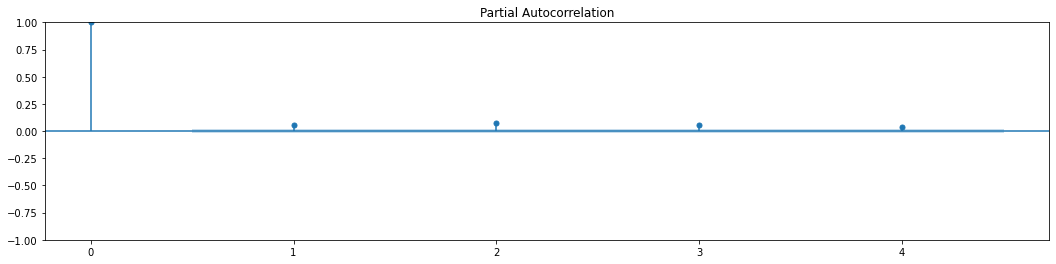

<Figure size 8064x576 with 0 Axes>

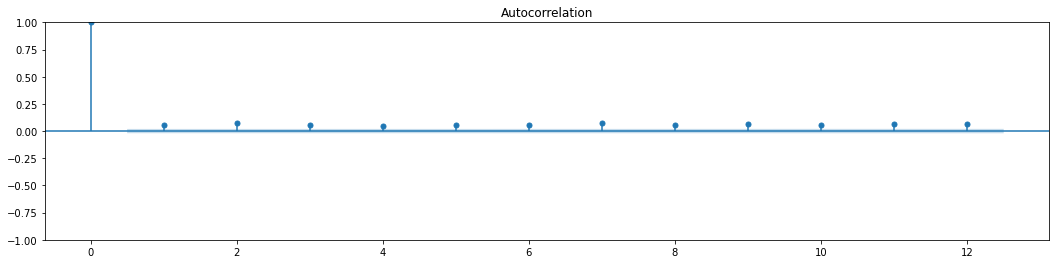

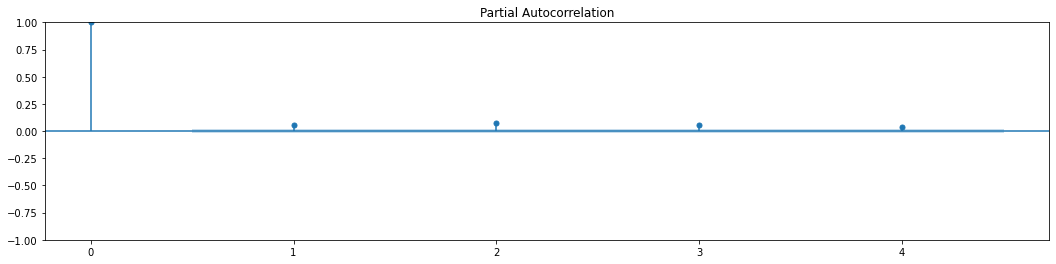

In [426]:
plt.figure(figsize=(112,8))
tsa_plots.plot_acf(df_t.Sales_volume_in_Tonnes, lags = 12)
tsa_plots.plot_pacf(df_t.Sales_volume_in_Tonnes, lags = 4)

In [427]:
#Calculate ad fuller statistic
adf = adfuller(df_t['Sales_volume_in_Tonnes'])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.0 , Series is Stationary


In [428]:
# Data Partition
Train = pd.DataFrame(df_t['Sales_volume_in_Tonnes'].head(8000))
Test = pd.DataFrame(df_t['Sales_volume_in_Tonnes'].tail(2000))

In [429]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# ARIMA with AR = 4, MA = 6
model1 = ARIMA(df_t, order = (1, 0, 2))
res = model1.fit()
print(res.summary())

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-

                                 SARIMAX Results                                  
Dep. Variable:     Sales_volume_in_Tonnes   No. Observations:                10000
Model:                     ARIMA(1, 0, 2)   Log Likelihood              -18256.274
Date:                    Fri, 31 Mar 2023   AIC                          36522.549
Time:                            19:10:36   BIC                          36558.600
Sample:                                 0   HQIC                         36534.752
                                  - 10000                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5373      0.065    130.796      0.000       8.409       8.665
ar.L1          0.9916      0.002    422.925      0.000       0.987       0.996
ma.L1         -0.974

In [434]:
start_index = len(Train)
start_index
end_index = start_index + 1999
forecast_test = res.predict(start = start_index, end = end_index)
print(forecast_test)

Date
2017-08-09    8.639791
2017-09-09    8.646008
2017-10-09    8.630671
2017-11-09    8.621170
2017-12-09    8.647687
                ...   
2023-02-24    8.743588
2023-02-25    8.754717
2023-02-26    8.777316
2023-02-27    8.788233
2023-02-28    8.767470
Name: predicted_mean, Length: 2000, dtype: float64


<AxesSubplot:xlabel='Date'>

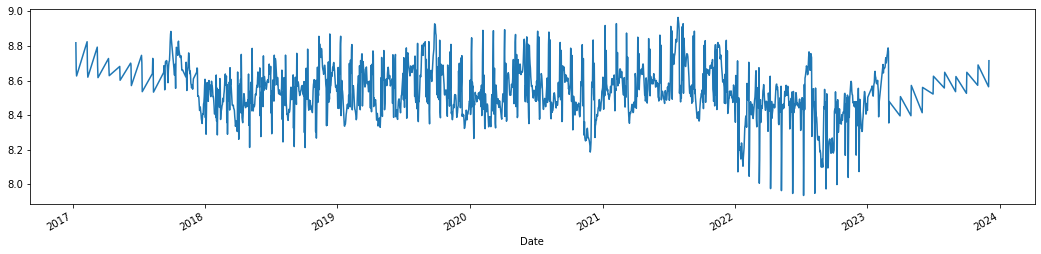

In [435]:

#df_t.plot(figsize=(8,8))
forecast_test.plot()

In [436]:
rmse_test_without = sqrt(mean_squared_error(Test.Sales_volume_in_Tonnes, forecast_test))

rmse_test_without

1.53129102717555

In [437]:
mse_without=mean_squared_error(Test.Sales_volume_in_Tonnes, forecast_test)
mse_without

2.344852209908351

In [438]:
inde_f=pd.date_range(start = '2023-02-28', end='2024-02-28')
inde_f

DatetimeIndex(['2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26',
               '2024-02-27', '2024-02-28'],
              dtype='datetime64[ns]', length=366, freq='D')

In [439]:
pre_without=res.predict(start=len(Test['Sales_volume_in_Tonnes']), end=len(Test['Sales_volume_in_Tonnes'])+365, dynamic=True)
pre_without.index=inde_f

<AxesSubplot:>

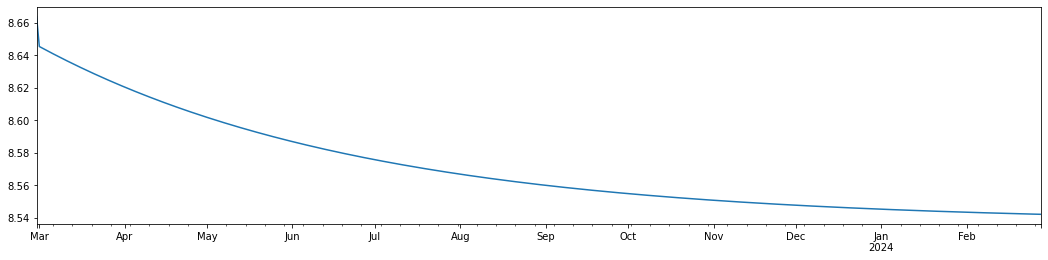

In [440]:
pre_without.plot()

# r&d

In [324]:
model1 = ARIMA(df_t, order = (1, 0, 1))
res = model1.fit()
print(res.summary())

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-

                                 SARIMAX Results                                  
Dep. Variable:     Sales_volume_in_Tonnes   No. Observations:                10000
Model:                     ARIMA(1, 0, 1)   Log Likelihood              -18256.742
Date:                    Fri, 31 Mar 2023   AIC                          36521.483
Time:                            16:27:12   BIC                          36550.325
Sample:                                 0   HQIC                         36531.246
                                  - 10000                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5369      0.066    129.385      0.000       8.408       8.666
ar.L1          0.9918      0.002    432.859      0.000       0.987       0.996
ma.L1         -0.965

In [325]:
inde_f=pd.date_range(start = '2023-02-28', end='2024-02-28')
inde_f

DatetimeIndex(['2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26',
               '2024-02-27', '2024-02-28'],
              dtype='datetime64[ns]', length=366, freq='D')

In [326]:
Train1=df_t.head(8000)
Test2=df_t.tail(2000)

In [328]:

start_index = len(df_t)
start_index
end_index = start_index + 365
forecast_test = res.predict(start = start_index, end = end_index)
forecast_test.index=inde_f
print(forecast_test)

2023-02-28    8.798012
2023-03-01    8.795882
2023-03-02    8.793770
2023-03-03    8.791675
2023-03-04    8.789597
                ...   
2024-02-24    8.550476
2024-02-25    8.550365
2024-02-26    8.550255
2024-02-27    8.550146
2024-02-28    8.550038
Freq: D, Name: predicted_mean, Length: 366, dtype: float64


C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [307]:
forecas=(res.predict(start = index1,end=index2,dynamic=True))
forecas.index=future_df

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: Index data must be 1-dimensional

In [306]:
forecas.head()

(nan,)    8.798012
(nan,)    8.795882
(nan,)    8.793770
(nan,)    8.791675
(nan,)    8.789597
Name: predicted_mean, dtype: float64

In [271]:
future_df['forecast']

1995-10-14   NaN
1995-10-15   NaN
1995-10-16   NaN
1995-10-17   NaN
1995-10-18   NaN
              ..
2024-02-23   NaN
2024-02-24   NaN
2024-02-25   NaN
2024-02-26   NaN
2024-02-27   NaN
Name: forecast, Length: 10364, dtype: float64

<AxesSubplot:>

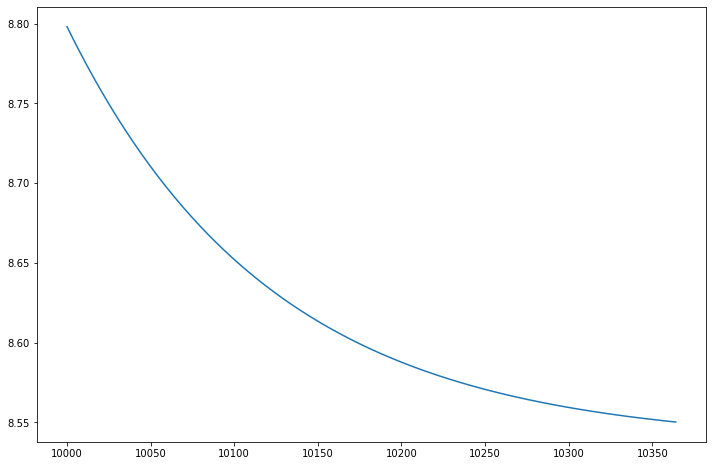

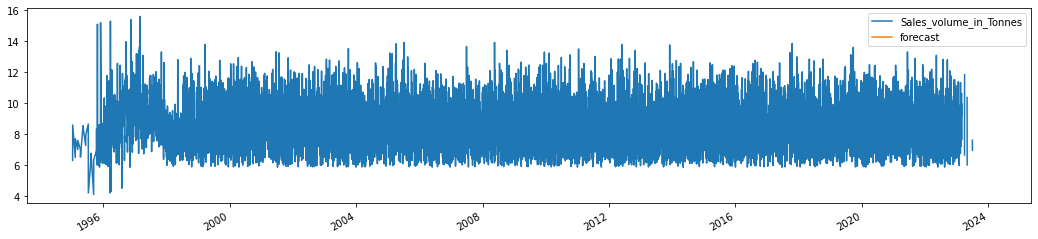

In [238]:
forecast.plot(figsize=(12, 8))
future_df.plot()

# ARIMA with normlization and outlier analysis

In [332]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

df_norm = norm_func(df_num)


In [333]:
df_norm

,Sales_in_rs_per_ton,Sales_volume_in_Tonnes,Price_per_kg,Diameter,Length,Current stock,Re_order,Lead_time,Production_time,Units Produced,Production_cost
Date,,,,,,,,,,,
1995-10-14,0.589396,0.258261,0.416667,1.000000,0.321429,0.648006,0.116232,0.428571,0.333333,0.900644,0.373149
1995-10-15,0.591584,0.369565,0.041667,0.166667,0.107143,0.420157,0.694389,0.071429,0.333333,0.692835,0.629252
1995-10-16,0.596296,0.236522,0.541667,0.166667,0.178571,0.360838,0.871743,0.928571,0.833333,0.772667,0.475690
1995-10-17,0.599998,0.240000,0.541667,0.000000,0.750000,0.003087,0.186373,0.928571,0.166667,0.208832,0.807223
1995-10-18,0.599998,0.291304,0.333333,1.000000,0.821429,0.501251,0.202405,0.714286,0.833333,0.154860,0.498399
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,0.708794,0.437391,0.083333,0.041667,0.535714,0.057734,0.705411,0.928571,0.833333,0.144843,0.278711
2023-02-25,0.853144,0.512174,0.125000,0.333333,0.821429,0.352244,0.991984,0.500000,0.500000,0.493714,0.764106
2023-02-26,0.937577,0.412174,0.833333,0.458333,0.500000,0.759136,0.107214,0.500000,0.000000,0.652969,0.811525


In [334]:
df_cat

,Location,Climate,Grade
Date,,,
1995-10-14,Pune,Rainy,Fe-500
1995-10-15,Hyderabad,Rainy,Fe-415
1995-10-16,Kolkata,Rainy,Fe-500D
1995-10-17,Bengaluru,Rainy,Fe-550
1995-10-18,Delhi,Rainy,Fe-500
...,...,...,...
2023-02-24,Pune,Winter,Fe-500D
2023-02-25,Delhi,Winter,Fe-600D
2023-02-26,Kolkata,Sunny,Fe-550D


In [335]:
# Data Partition
Train = pd.DataFrame(df_norm['Sales_volume_in_Tonnes'].head(8000))
Test = pd.DataFrame(df_norm['Sales_volume_in_Tonnes'].tail(2000))


In [336]:
Train

,Sales_volume_in_Tonnes
Date,
1995-10-14,0.258261
1995-10-15,0.369565
1995-10-16,0.236522
1995-10-17,0.240000
1995-10-18,0.291304
...,...
2017-03-09,0.162609
2017-04-09,0.431304
2017-05-09,0.581739


C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


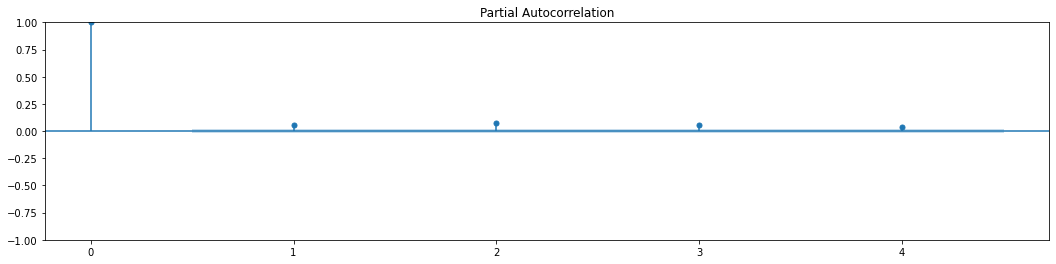

<Figure size 8064x576 with 0 Axes>

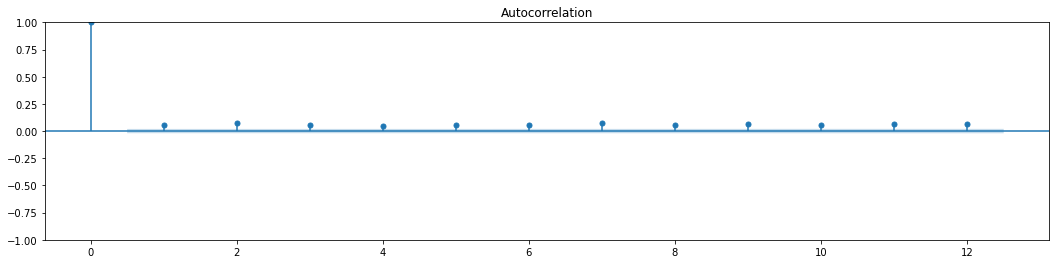

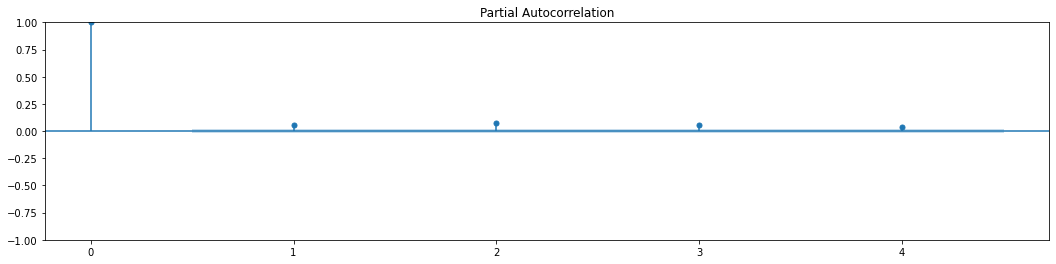

In [337]:
plt.figure(figsize=(112,8))
tsa_plots.plot_acf(df_norm.Sales_volume_in_Tonnes, lags = 12)
tsa_plots.plot_pacf(df_norm.Sales_volume_in_Tonnes, lags = 4)

In [350]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# ARIMA with AR = 4, MA = 6
model1 = ARIMA(df_norm['Sales_volume_in_Tonnes'], order = (4, 1, 6))
res1 = model1.fit()
print(res1.summary())


C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-

                                 SARIMAX Results                                  
Dep. Variable:     Sales_volume_in_Tonnes   No. Observations:                10000
Model:                     ARIMA(4, 1, 6)   Log Likelihood                6154.816
Date:                    Fri, 31 Mar 2023   AIC                         -12287.631
Time:                            18:42:31   BIC                         -12208.319
Sample:                                 0   HQIC                        -12260.784
                                  - 10000                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0075      0.359     -2.803      0.005      -1.712      -0.303
ar.L2         -0.8171      0.456     -1.791      0.073      -1.711       0.077
ar.L3         -0.879

In [351]:
start_index = len(Train)
start_index
end_index = start_index + 1999
forecast_test = res1.predict(start = start_index, end = end_index)

<AxesSubplot:xlabel='Date'>

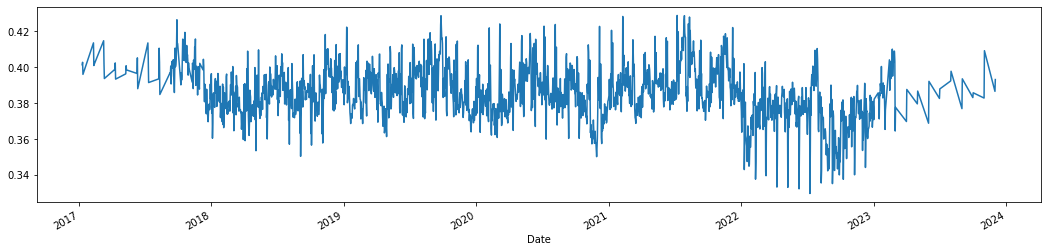

In [352]:
forecast_test.plot()

<AxesSubplot:xlabel='Date'>

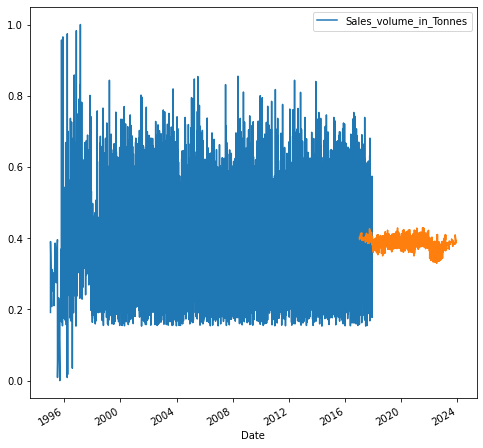

In [353]:

Train.plot(figsize=(8,8))
forecast_test.plot()

In [354]:
rmse_test = sqrt(mean_squared_error(Test.Sales_volume_in_Tonnes, forecast_test))

rmse_test

0.13330458404685336

from sklearn.metrics import mean_squared_error

In [355]:
rmsek=mean_squared_error(Test.Sales_volume_in_Tonnes, forecast_test)

In [356]:
rmsek

0.01777011212790459

In [362]:
Test = pd.DataFrame(df_norm['Sales_volume_in_Tonnes'].tail(6000))

In [371]:
# ARIMA with AR = 4, MA = 6
model1 = ARIMA(Test, order = (1, 1, 1))
res1 = model1.fit()
print(res1.summary())

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-

                                 SARIMAX Results                                  
Dep. Variable:     Sales_volume_in_Tonnes   No. Observations:                 6000
Model:                     ARIMA(1, 1, 1)   Log Likelihood                3632.995
Date:                    Fri, 31 Mar 2023   AIC                          -7259.989
Time:                            18:51:36   BIC                          -7239.891
Sample:                                 0   HQIC                         -7253.010
                                   - 6000                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0127      0.013     -0.984      0.325      -0.038       0.013
ma.L1         -1.0000      0.007   -135.744      0.000      -1.014      -0.986
sigma2         0.017

In [372]:
predictions=res1.predict(start=len(Test['Sales_volume_in_Tonnes']), end=len(Test['Sales_volume_in_Tonnes'])+365, dynamic=True)


C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [373]:
predictions.index=inde_f


<AxesSubplot:>

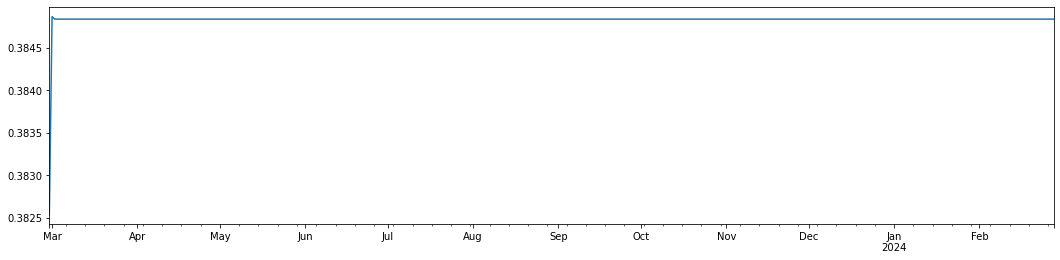

In [374]:
predictions.plot()

# Auto ARIMA

In [2]:
deep = pd.read_csv("C:/Users/sidda/Desktop/project 97/TMT-JUNE-2020_2 (1) - Copy.csv")  # reading dataset with pandas

In [3]:
deep=deep.drop(['Time', 'Location', 'Sales in Rs/T',
       'Price/ kg', 'Climate', 'Customer ID', 'Diameter', 'Length', 'Grade',
       'Current stock', 'Re-order', 'Lead time', 'Production time',
       'Units Produced ', 'Production cost'],axis=1)

In [4]:
deep

,Date,Sales volume in Tonnes
0,14-10-1995,7.07
1,15-10-1995,8.35
2,16-10-1995,6.82
3,17-10-1995,6.86
4,18-10-1995,7.45
...,...,...
9995,24-02-2023,9.13
9996,25-02-2023,9.99
9997,26-02-2023,8.84
9998,27-02-2023,7.64


In [5]:
deep['Sales volume in Tonnes']= deep['Sales volume in Tonnes'].interpolate(method='linear')

In [6]:
deep['Date']=pd.to_datetime(deep['Date'])
# set the Date column be the index of our dataset
deep= deep.set_index('Date')
# now check the data shape

In [14]:
deep.columns=['tonnes']

In [15]:
Train1 = pd.DataFrame(deep['tonnes'].head(8000))
Test1 = pd.DataFrame(deep['tonnes'].tail(2000))

In [16]:
import pmdarima as pm
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [17]:
model = pm.auto_arima(Train1, seasonal=False)

In [18]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8000
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -14578.807
Date:                Thu, 30 Mar 2023   AIC                          29163.615
Time:                        22:27:38   BIC                          29184.576
Sample:                             0   HQIC                         29170.790
                               - 8000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   5.38e-05   1.86e+04      0.000       1.000       1.000
ma.L1         -0.9714      0.003   -341.274      0.000      -0.977      -0.966
sigma2         2.2389      0.037     60.462      0.0

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
arima_model = ARIMA(deep['tonnes'], order=model.order)
arima_fit = arima_model.fit()
print(arima_fit.summary)

C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sidda\anaconda3\lib\site-

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x0000016B49665EB0>>


In [ ]:
#model1 = ARIMA(df_t['Sales_volume_in_Tonnes'], order = (4, 1, 6))
#res = model1.fit()
#print(res.summary())

In [25]:
start_index = len(Train1)
start_index
end_index = start_index + 1999
forecast_test = arima_fit.predict(start = start_index, end = end_index)
print(forecast_test)

Date
2017-08-09    8.652952
2017-09-09    8.637930
2017-10-09    8.622901
2017-11-09    8.617199
2017-12-09    8.661725
                ...   
2023-02-24    8.745223
2023-02-25    8.753499
2023-02-26    8.783787
2023-02-27    8.783231
2023-02-28    8.751585
Name: predicted_mean, Length: 2000, dtype: float64


<AxesSubplot:xlabel='Date'>

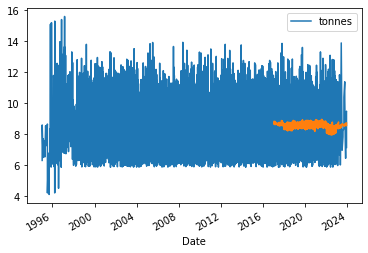

In [27]:
deep.plot()
forecast_test.plot()

In [31]:
pre_auto=arima_fit.predict(start=len(deep['tonnes']), end=len(deep['tonnes'])+1000, dynamic=True)


C:\Users\sidda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
pre_auto

10000    8.798012
10001    8.795882
10002    8.793770
10003    8.791675
10004    8.789597
           ...   
10996    8.536969
10997    8.536968
10998    8.536967
10999    8.536967
11000    8.536966
Name: predicted_mean, Length: 1001, dtype: float64

<AxesSubplot:>

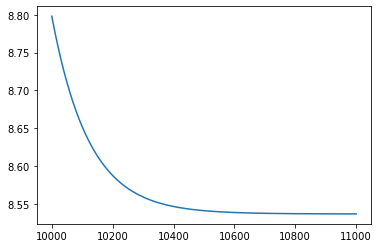

In [33]:
pre_auto.plot()